<a href="https://colab.research.google.com/github/romitbarua/MultiModalDeepFake/blob/main/TestingNotebooks/LibrosaFeatureExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librosa Feature Exploration

https://librosa.org/doc/main/feature.html

In [ ]:
#https://www.kaggle.com/code/gthmk8/audio-signal-processing-librosa/edit

In [ ]:
#https://dphi.tech/blog/audio-data-analysis-using-deep-learning-with-python-part-1/

In [ ]:
#https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html

In [ ]:
#https://rramnauth2220.github.io/blog/posts/code/200525-feature-extraction.html

In [ ]:
#https://musicinformationretrieval.com/spectral_features.html

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
#!pip install moviepy
#!pip3 install imageio==2.4.1
#!pip install --upgrade imageio-ffmpeg

In [4]:
import librosa
import os
import numpy as np
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import matplotlib.pyplot as plt
import moviepy.editor as mp

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2629632/45929032 bytes (5.7%)5996544/45929032 bytes (13.1%)7798784/45929032 bytes (17.0%)11051008/45929032 bytes (24.1%)14188544/45929032 bytes (30.9%)17186816/45929032 bytes (37.4%)20594688/45929032 bytes (44.8%)23650304/45929032 bytes (51.5%)26918912/45929032 bytes (58.6%)30277632/45929032 bytes (65.9%)33538048/45929032 bytes (73.0%)36741120/45929032 bytes (80.0%)

In [5]:
audio_file = r'/content/drive/MyDrive/FakeAVCeleb/FakeAVCeleb_v1.2/RealVideo-RealAudio/African/men/id00076/00109.wav'

In [6]:
x, sr = librosa.load(audio_file)

In [8]:
x.shape, sr

((222705,), 22050)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

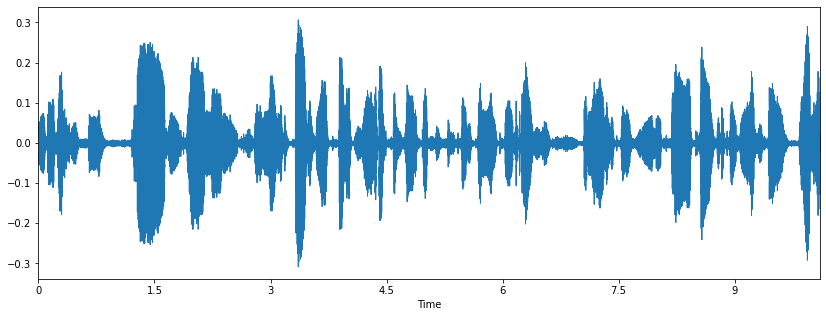

In [10]:
#plotting the audio array with librosa.display.wavplot
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

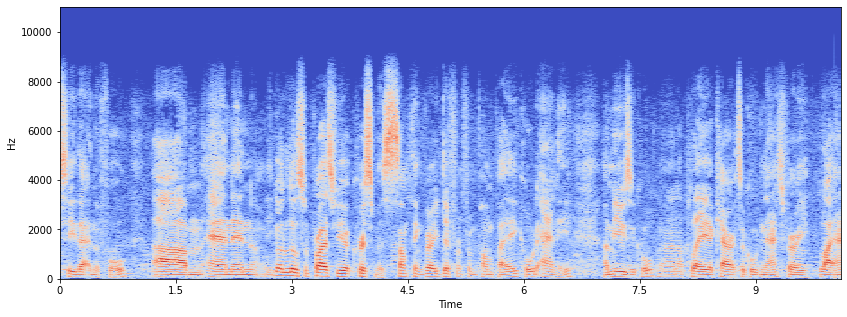

In [11]:
#displaying the spectrogram using librosa.display.specshow
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
import IPython.display as ipd
ipd.Audio(audio_file) # load a local WAV file

In [12]:
%matplotlib inline
from pathlib import Path
import numpy, scipy, matplotlib.pyplot as plt, sklearn, urllib, IPython.display as ipd
import librosa, librosa.display

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
#let's now construct a feature vector >feature vector is simply a collection of features.
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(signal)[0, 0],
    ]

In [23]:
librosa.feature.zero_crossing_rate(x)[0, 0]

0.2197265625

In [24]:
librosa.feature.spectral_centroid(x)[0, 0]

4652.918765494817

## Spectral Centroid

https://librosa.org/doc/main/generated/librosa.feature.spectral_centroid.html

In [27]:
y, sr = librosa.load(audio_file)
cent = librosa.feature.spectral_centroid(y=y, sr=sr)

In [29]:
S, phase = librosa.magphase(librosa.stft(y=y))
cent2 = librosa.feature.spectral_centroid(S=S)

In [32]:
freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)
cent3 = librosa.feature.spectral_centroid(S=np.abs(D), freq=freqs)

[Text(0.5, 1.0, 'log Power spectrogram')]

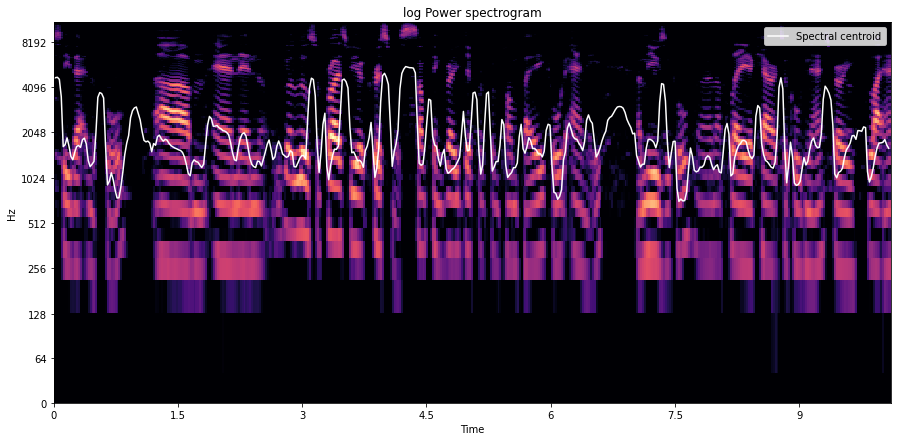

In [65]:
import matplotlib.pyplot as plt
times = librosa.times_like(cent)
fig, ax = plt.subplots(figsize=(15, 7))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

## RMS

https://musicinformationretrieval.com/energy.html

In [53]:
y, sr = librosa.load(audio_file)
rms = librosa.feature.rms(y=y)

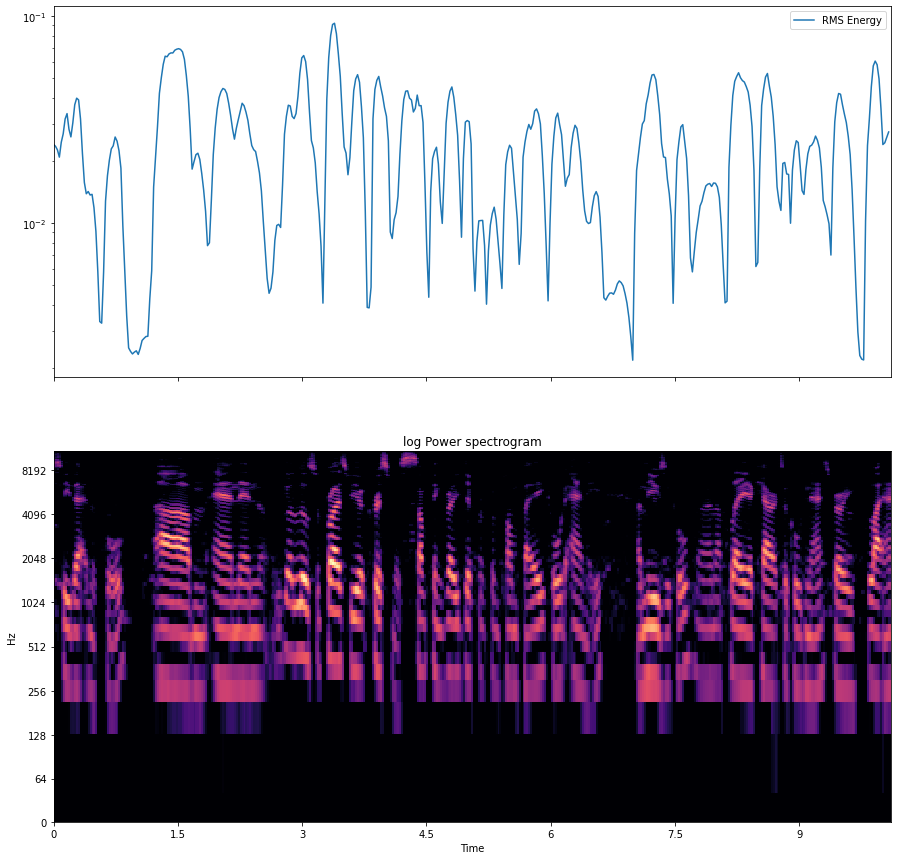

In [54]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(15, 15))
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

S = librosa.magphase(librosa.stft(y, window=np.ones, center=False))[0]
librosa.feature.rms(S=S)
plt.show()

## Mel Spectrogram

https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html

In [50]:
y, sr = librosa.load(audio_file)
mel = librosa.feature.melspectrogram(y=y, sr=sr)

In [51]:
#D = np.abs(librosa.stft(y))**2
#S = librosa.feature.melspectrogram(S=D, sr=sr)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

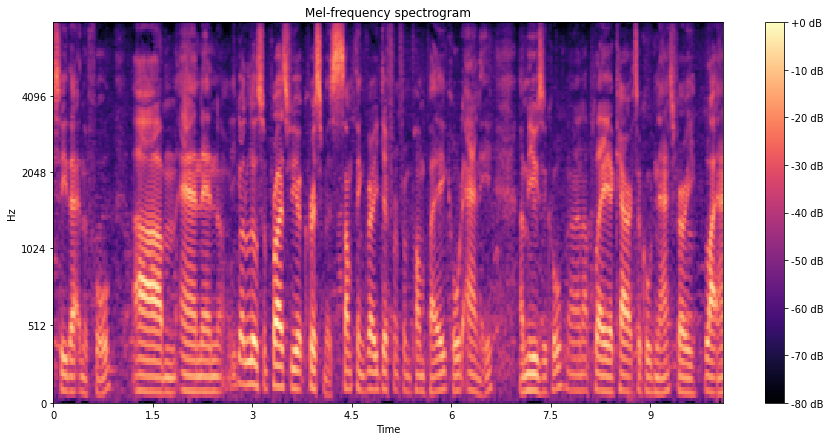

In [64]:
fig, ax = plt.subplots(figsize=(15, 7))
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

## MFCC

https://librosa.org/doc/main/generated/librosa.feature.mfcc.html

In [66]:
y, sr = librosa.load(audio_file)
mfcc1 = librosa.feature.mfcc(y=y, sr=sr)
mfcc2 = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True)

In [67]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                   fmax=8000)
mfcc3 = librosa.feature.mfcc(S=librosa.power_to_db(S))

In [68]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

[Text(0.5, 1.0, 'MFCC')]

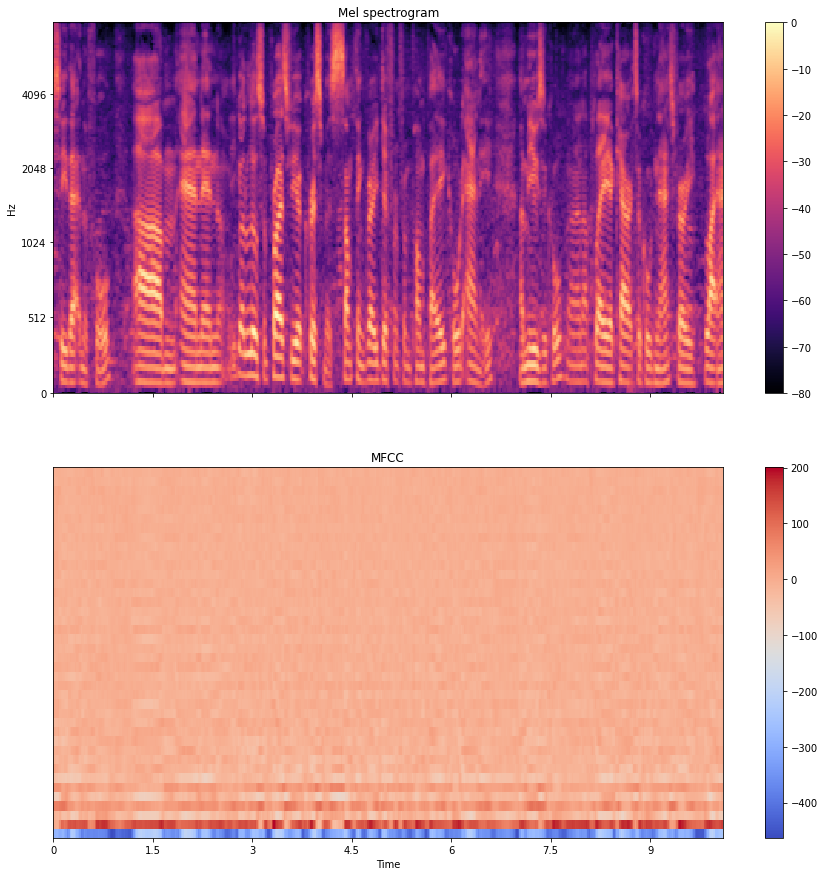

In [69]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(15, 15))
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')

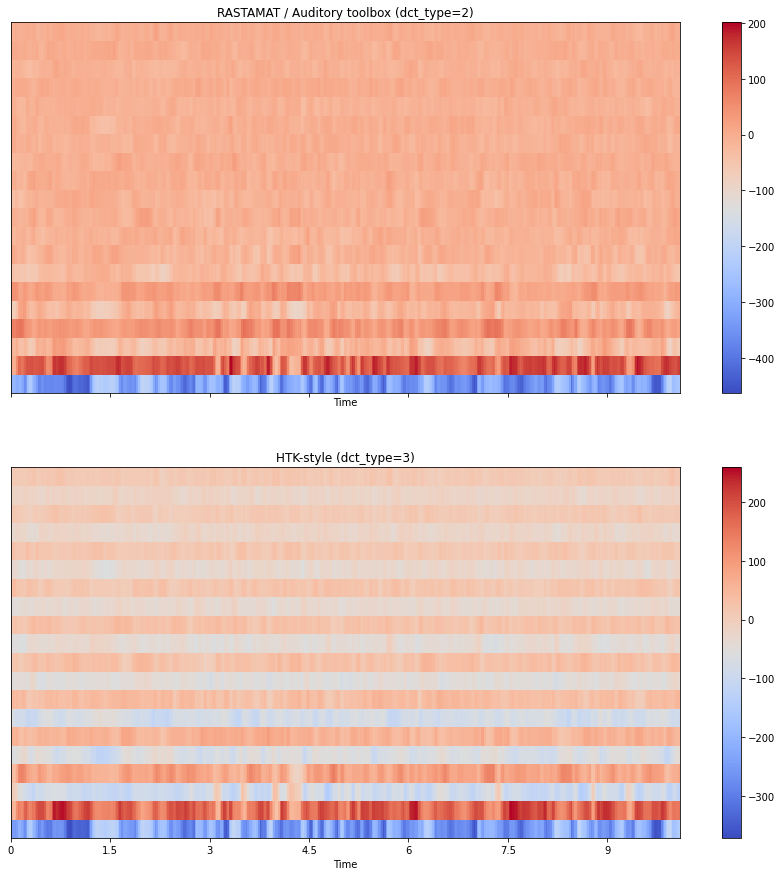

In [72]:
m_slaney = librosa.feature.mfcc(y=y, sr=sr, dct_type=2)
m_htk = librosa.feature.mfcc(y=y, sr=sr, dct_type=3)
fig, ax = plt.subplots(nrows=2, figsize=(15, 15), sharex=True, sharey=True)
img1 = librosa.display.specshow(m_slaney, x_axis='time', ax=ax[0])
ax[0].set(title='RASTAMAT / Auditory toolbox (dct_type=2)')
fig.colorbar(img, ax=[ax[0]])
img2 = librosa.display.specshow(m_htk, x_axis='time', ax=ax[1])
ax[1].set(title='HTK-style (dct_type=3)')
fig.colorbar(img2, ax=[ax[1]])

In [74]:
m_slaney[0].shape

(435,)

In [75]:
m_slaney.shape

(20, 435)

In [76]:
m_htk.shape

(20, 435)

In [77]:
y.shape

(222705,)

In [78]:
mfcc.shape

(20, 435)

## Poly Features

https://librosa.org/doc/main/generated/librosa.feature.poly_features.html

In [79]:
y, sr = librosa.load(audio_file)
S = np.abs(librosa.stft(y))

In [80]:
p0 = librosa.feature.poly_features(S=S, order=0)
p1 = librosa.feature.poly_features(S=S, order=1)
p2 = librosa.feature.poly_features(S=S, order=2)

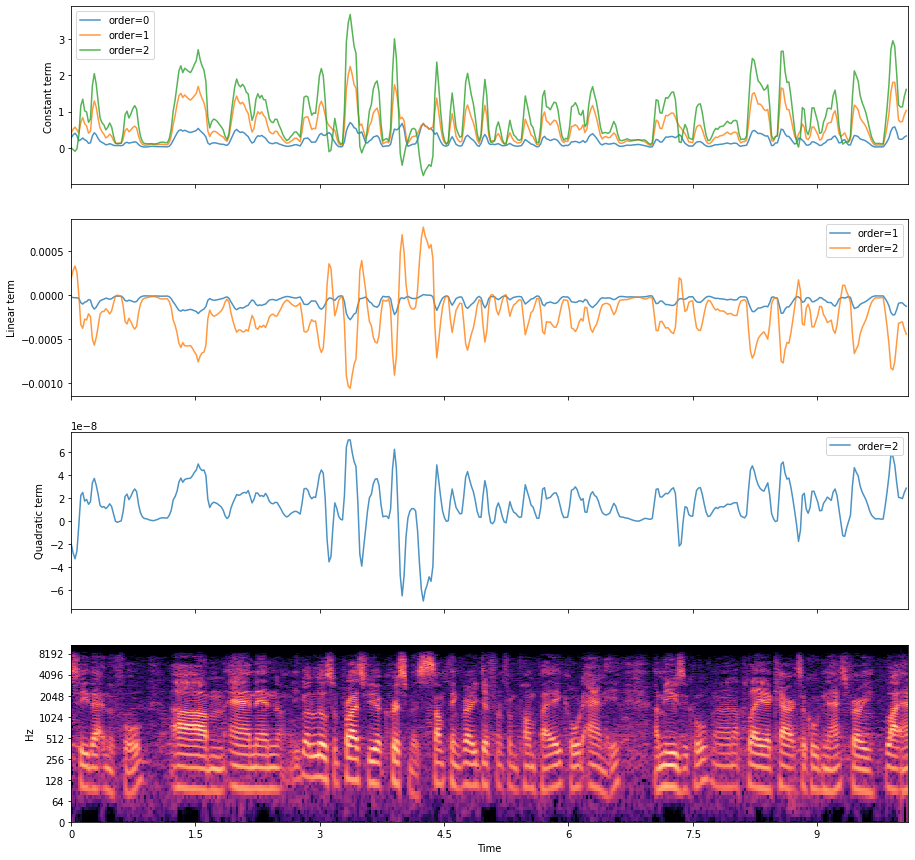

In [83]:
fig, ax = plt.subplots(nrows=4, figsize=(15, 15), sharex=True)
times = librosa.times_like(p0)
ax[0].plot(times, p0[0], label='order=0', alpha=0.8)
ax[0].plot(times, p1[1], label='order=1', alpha=0.8)
ax[0].plot(times, p2[2], label='order=2', alpha=0.8)
ax[0].legend()
ax[0].label_outer()
ax[0].set(ylabel='Constant term ')
ax[1].plot(times, p1[0], label='order=1', alpha=0.8)
ax[1].plot(times, p2[1], label='order=2', alpha=0.8)
ax[1].set(ylabel='Linear term')
ax[1].label_outer()
ax[1].legend()
ax[2].plot(times, p2[0], label='order=2', alpha=0.8)
ax[2].set(ylabel='Quadratic term')
ax[2].legend()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[3])

## Spectral Rolloff

The roll-off frequency is defined as the frequency under which some percentage (cutoff) of the total energy of the spectrum is contained. The roll-off frequency can be used to distinguish between harmonic (below roll-off) and noisy sounds (above roll-off).

https://librosa.org/doc/main/generated/librosa.feature.spectral_rolloff.html

In [91]:
y, sr = librosa.load(audio_file)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
rolloff_min = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.01)


In [89]:
S, phase = librosa.magphase(librosa.stft(y))
rolloff = librosa.feature.spectral_rolloff(S=S, sr=sr)

[Text(0.5, 1.0, 'log Power spectrogram')]

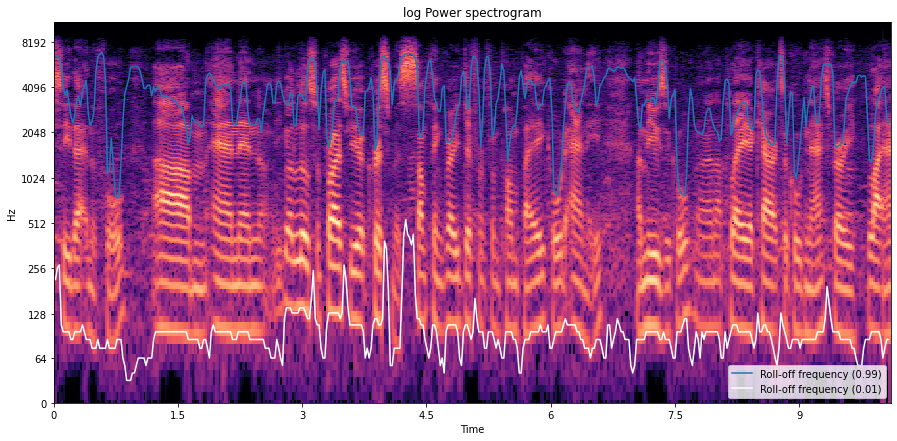

In [93]:
fig, ax = plt.subplots(figsize=(15, 7))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.99)')
ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w',
        label='Roll-off frequency (0.01)')
ax.legend(loc='lower right')
ax.set(title='log Power spectrogram')

## Spectral Bandwidth

https://librosa.org/doc/main/generated/librosa.feature.spectral_bandwidth.html

In [94]:
y, sr = librosa.load(audio_file)
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

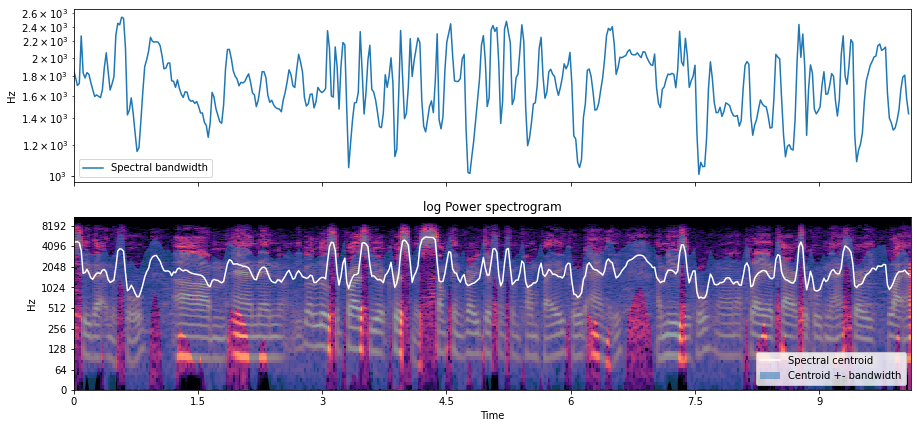

In [95]:
fig, ax = plt.subplots(figsize=(15, 7), nrows=2, sharex=True)
times = librosa.times_like(spec_bw)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, np.maximum(0, centroid[0] - spec_bw[0]),
                np.minimum(centroid[0] + spec_bw[0], sr/2),
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

# Autocorrelation
The autocorrelation of a signal describes the similarity of a signal against a time-shifted version of itself. For a signal $x$, the autocorrelation $r$ is:

$$ r(k) = \sum_n x(n) x(n-k) $$

In this equation, $k$ is often called the lag parameter. $r(k)$ is maximized at $k = 0$ and is symmetric about $k$.

The autocorrelation is useful for finding repeated patterns in a signal. For example, at short lags, the autocorrelation can tell us something about the signal's fundamental frequency. For longer lags, the autocorrelation may tell us something about the tempo of a musical signal.

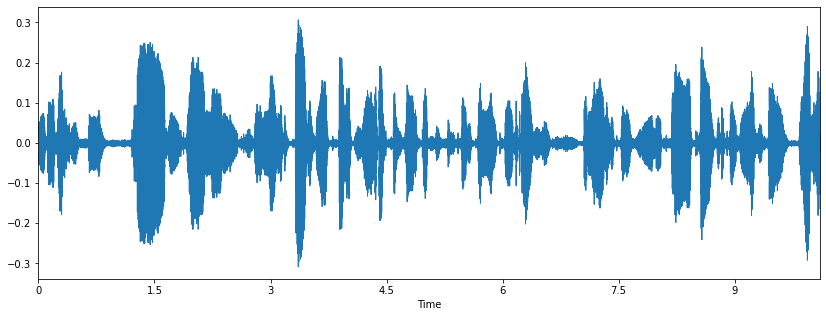

In [96]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr)

In [97]:
# Because the autocorrelation produces a symmetric signal, we only care about the "right half".
r = numpy.correlate(y, y, mode='full')[len(x)-1:]
print(x.shape, r.shape)

(222705,) (222705,)


(0.0, 10000.0)

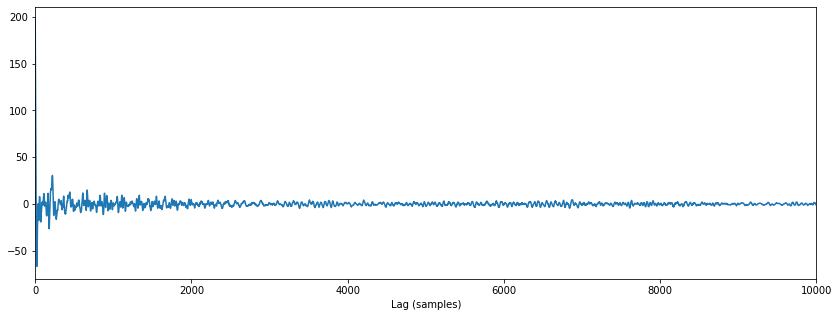

In [98]:
#Plot the autocorrelation:
plt.figure(figsize=(14, 5))
plt.plot(r[:10000])
plt.xlabel('Lag (samples)')
plt.xlim(0, 10000)

In [99]:
r = librosa.autocorrelate(y, max_size=10000)
print(r.shape)

(10000,)


(0.0, 10000.0)

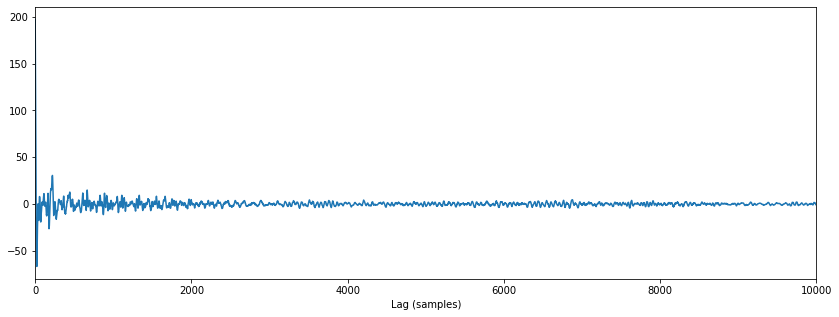

In [100]:
plt.figure(figsize=(14, 5))
plt.plot(r)
plt.xlabel('Lag (samples)')
plt.xlim(0, 10000)

# Pitch Estimation
The autocorrelation is used to find repeated patterns within a signal. For musical signals, a repeated pattern can correspond to a pitch period. We can therefore use the autocorrelation function to estimate the pitch in a musical signal.

The autocorrelation always has a maximum at zero, i.e. zero lag. We want to identify the maximum outside of the peak centered at zero. Therefore, we might choose only to search within a range of reasonable pitches:

In [101]:
midi_hi = 120.0
midi_lo = 12.0
f_hi = librosa.midi_to_hz(midi_hi)
f_lo = librosa.midi_to_hz(midi_lo)
t_lo = sr/f_hi
t_hi = sr/f_lo

In [102]:
print(f_lo, f_hi)
print(t_lo, t_hi)

16.351597831287414 8372.018089619156
2.633773573344376 1348.4920695523206


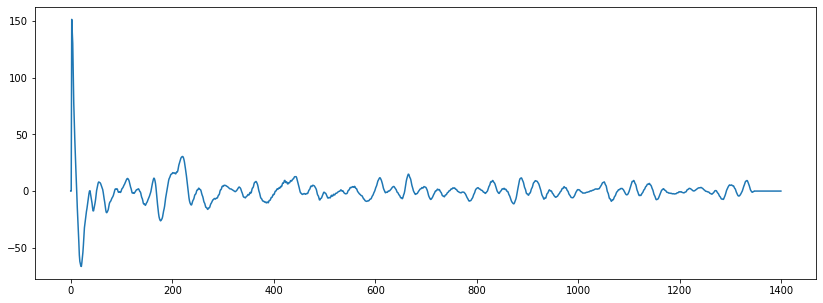

In [103]:
r[:int(t_lo)] = 0
r[int(t_hi):] = 0
plt.figure(figsize=(14, 5))
plt.plot(r[:1400])

## TBD: Onset Detection and Peak Estimation